https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import neighbors
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

y[::5] += 1 * (0.5 - np.random.rand(8))

Error_500: 0.014260563551122558
Error_40: 0.5433116518098207
Error_abs: [0.38263821]
Error_500: 0.007500735479967559
Error_40: 0.5866778082768369
Error_abs: [0.41721547]


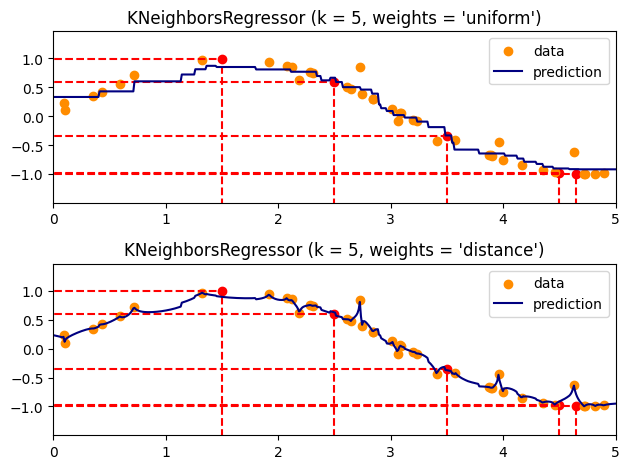

In [3]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    prueba = knn.fit(X, y)
    y_ = prueba.predict(T)
    mean_error_500 = mean_squared_error(np.sin(T).ravel(), y_)
    print("Error_500:", mean_error_500)

    mean_error_40 = mean_squared_error(y, y_[:40])
    print("Error_40:", mean_error_40)
    
    plt.subplot(2, 1, i + 1)

    puntos_prueba = [1.5, 2.5, 3.5, 4.5, 4.65]
    error_abs = 0
    for punto in puntos_prueba:
        plt.scatter(punto, np.sin(punto), color="red")
        plt.plot([-5, punto], [np.sin(punto)] * 2, color='red', linestyle='--')
        plt.plot([punto, punto], [-5, np.sin(punto)], color='red', linestyle='--')
        error_abs += abs(prueba.predict(np.array([punto]).reshape(-1, 1)) - np.sin(punto))
    print("Error_abs:", error_abs)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

    plt.xlim(T.min(), T.max())
    plt.ylim(min(min(y_)-0.5, min(y)-0.5), max(max(y_)+0.5, max(y)+0.5))


plt.tight_layout()
plt.show()
